In [1]:
%matplotlib inline

In [2]:
import boxsimu
from boxsimu import ur

In [3]:
m_water = 1e10 * ur.kg
m_0 = 1e5 * ur.kg
flow_rate = 1e8 * ur.kg / ur.day

In [4]:
# FLUIDS
freshwater = boxsimu.Fluid('freshwater', rho=1000*ur.kg/ur.meter**3)

# VARIABLES
po4 = boxsimu.Variable('po4')

# PROCESSES
# No processes in this system

# REACTIONS
# No reactions in this system

# BOXES
lake = boxsimu.Box(
    name='lake',
    description='Little Lake',
    fluid=freshwater.q(m_water),
    variables=[po4.q(m_0)],
)

# FLOWS
inflow = boxsimu.Flow(
    name='Inflow', 
    source_box=None,
    target_box=lake,
    rate=flow_rate,
    tracer_transport=True,
    concentrations={po4: 3e-1 * ur.gram / ur.kg}, 
)

outflow = boxsimu.Flow(
    name='Outflow',
    source_box=lake,
    target_box=None,
    rate=flow_rate,
    tracer_transport=True,
)

# FLUXES
# No fluxes in this system

# BOXMODELSYSTEM
system = boxsimu.BoxModelSystem(
    name='lake_system', 
    description='Simple Lake Box Model',
    boxes=[lake,], 
    flows=[inflow, outflow,],
)

DDATTEE
Start solving the BoxModelSystem...
- total integration time: 800 day
- dt (time step): 1 day
- number of time steps: 800
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
Function "solve(...)" used 5.717s


(<matplotlib.figure.Figure at 0x7f13a25e5940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f13a023b630>)

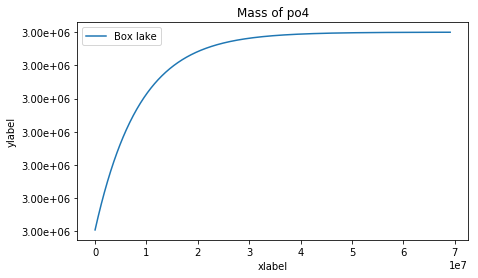

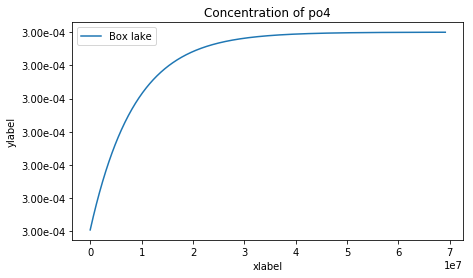

In [7]:
sol = system.solve(800*ur.day, 1*ur.day, save_frequency=200)

sol.df[:10]

sol.plot_variable_mass(po4)

sol.plot_variable_concentration(po4)

In [16]:
import datetime
t = datetime.date.today()


print('{:%Y%m%d}'.format(t))

20171220


In [2]:
import os.path
os.listdir()

['Tutorial Code.ipynb',
 'lake_system_TS200.pickle',
 'lake_system_TS400.pickle',
 '.ipynb_checkpoints',
 'tutorial_part1.ipynb',
 'lake_system_TS600.pickle']